## Ebola infected Macaque Sample Composition Trajectory Identification

In this notebook we deconvolve the ebov macaque blood samples using a matched seq-well reference.

In [1]:
import matplotlib.pylab as plt

In [2]:
import torch
from ternadecov.time_deconv import *
from ternadecov.simulator import *
from ternadecov.stats_helpers import *

# Configuration

In [3]:
device = torch.device("cuda:0")
dtype = torch.float32
dtype_np = np.float32
n_iters = 20_000

# Load data

In [4]:
bulk_anndata_path = "/home/nbarkas/disk1/work/deconvolution_method/datasets/ebov/load_data_python/ebov_bulk.h5ad"
sc_anndata_path = "/home/nbarkas/Downloads/bgi_pbmc.h5ad"

In [5]:
with open(bulk_anndata_path, 'rb') as fh:
    bulk_anndata = anndata.read_h5ad(fh)
with open(sc_anndata_path, 'rb') as fh:
    sc_anndata = anndata.read_h5ad(fh)

In [6]:
# select samples only after or on tp 0 
bulk_anndata = bulk_anndata[bulk_anndata.obs['dpi_time'] >= 0,]

In [7]:
ebov_dataset = DeconvolutionDataset(
    sc_anndata = sc_anndata,
    sc_celltype_col = "Abbreviation",
    bulk_anndata = bulk_anndata,
    bulk_time_col = "dpi_time",
    dtype_np = dtype_np,
    dtype = dtype,
    device=device,
    feature_selection_method = 'single_cell_od' #'overdispersed_bulk'
)

# Run Deconvolution

In [8]:
pseudo_time_reg_deconv = TimeRegularizedDeconvolution(
    dataset=ebov_dataset,
    trajectory_model_type='gp',
    device=device,
    dtype=dtype)

In [9]:
pseudo_time_reg_deconv.fit_model(n_iters=n_iters, verbose=True, log_frequency=1000, clear_param_store=False)

[step: 0, time: 1 s ] loss: 13162334.25
[step: 1000, time: 19 s ] loss: 3534803.14
[step: 2000, time: 37 s ] loss: 1743696.22
[step: 3000, time: 55 s ] loss: 1160791.77
[step: 4000, time: 73 s ] loss: 917337.04
[step: 5000, time: 86 s ] loss: 801888.96
[step: 6000, time: 98 s ] loss: 742688.20
[step: 7000, time: 110 s ] loss: 710691.61
[step: 8000, time: 122 s ] loss: 692167.31
[step: 9000, time: 134 s ] loss: 681028.40
[step: 10000, time: 146 s ] loss: 674217.82
[step: 11000, time: 157 s ] loss: 669960.18
[step: 12000, time: 169 s ] loss: 667259.30
[step: 13000, time: 180 s ] loss: 665495.72
[step: 14000, time: 192 s ] loss: 664310.07
[step: 15000, time: 203 s ] loss: 663589.97
[step: 16000, time: 215 s ] loss: 663120.63
[step: 17000, time: 226 s ] loss: 662850.36
[step: 18000, time: 238 s ] loss: 662812.74
[step: 19000, time: 249 s ] loss: 662758.58


# Examine Outputs

<AxesSubplot:title={'center':'Losses'}, xlabel='iteration', ylabel='ELBO Loss'>

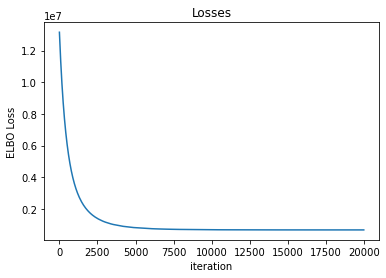

In [10]:
# Plot the loses
pseudo_time_reg_deconv.plot_loss()

In [11]:
pyro.get_param_store().keys()

dict_keys(['log_phi_posterior_loc_g', 'log_beta_posterior_loc_g', 'gp.f_loc', 'gp.f_scale_tril', 'f_posterior_loc_mc', 'gp.kernel.kern0.lengthscale', 'gp.kernel.kern0.variance', 'gp.kernel.kern1.variance', 'gp_f_mean_c'])

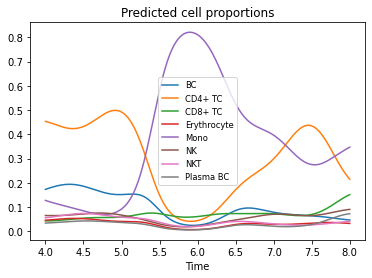

In [12]:
pseudo_time_reg_deconv.plot_composition_trajectories()

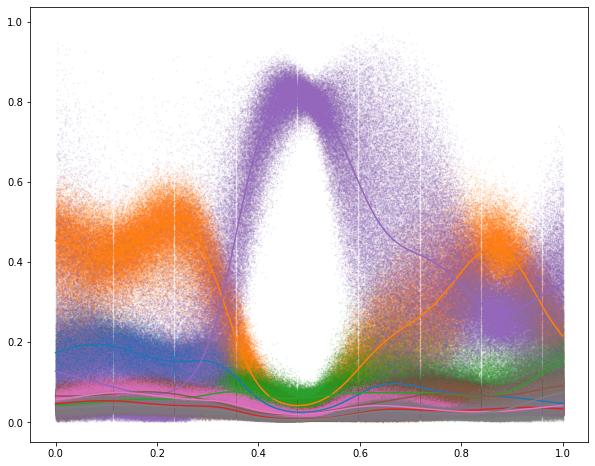

In [13]:
pseudo_time_reg_deconv.plot_composition_trajectories(show_sampled_trajectories = True, n_samples=500)

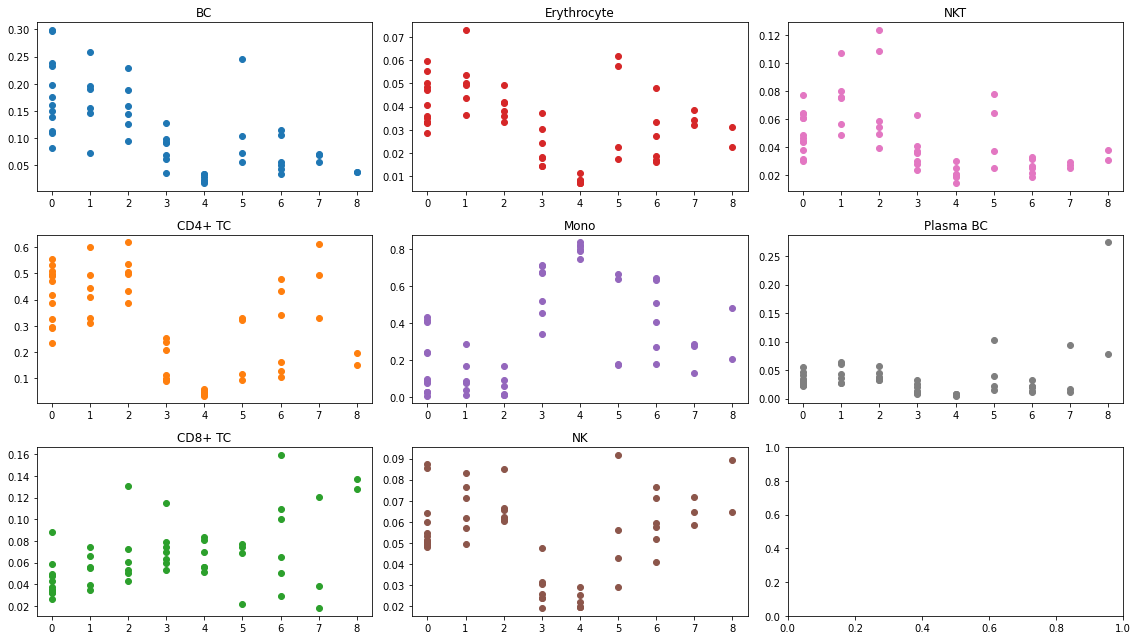

In [14]:
pseudo_time_reg_deconv.plot_sample_compositions_scatter()

In [15]:
# Do correlation between different cell types

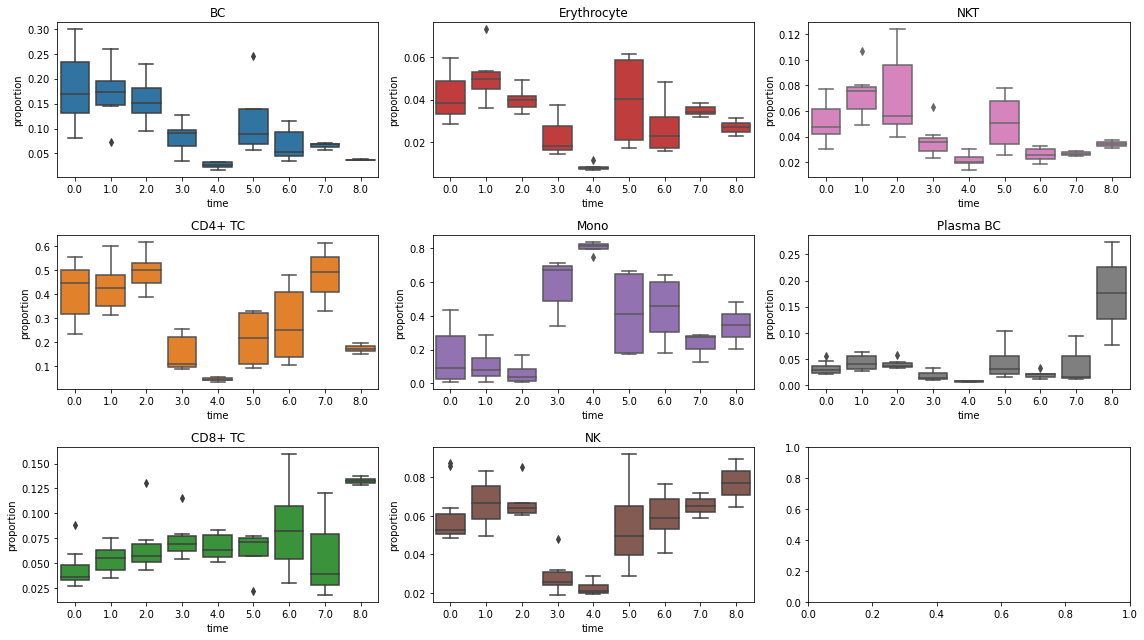

In [16]:
pseudo_time_reg_deconv.plot_sample_compositions_boxplot()
matplotlib.pyplot.show()